In [5]:
import numpy as np

# Define the grid dimensions
nx = 100  # Number of grid points in the x direction
ny = 100  # Number of grid points in the y direction

# Compute the grid spacing in the x and y directions
dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)

# Define the properties of the fluid
rho = 1.0  # Density of the fluid (kg/m^3)
mu = 1.0   # Dynamic viscosity of the fluid (Pa*s)

# Define the initial conditions
p = np.zeros((nx, ny))  # Pressure (Pa)
u = np.zeros((nx, ny))  # Velocity in the x direction (m/s)
v = np.zeros((nx, ny))  # Velocity in the y direction (m/s)

# Define the boundary conditions
bc_flow = np.zeros((nx, ny))  # Array to specify which cells allow fluid flow (1 = flow allowed, 0 = no flow)


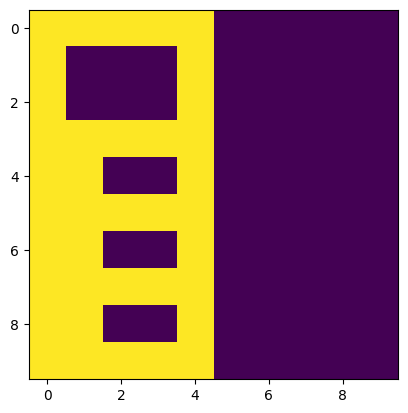

In [27]:
# Define a binary grid that will be used to draw "hello"
hello_grid = np.zeros((10, 10))

# Set the values of the grid cells to draw "hello"
hello_grid[0, [0, 1, 2, 3, 4]] = 1
hello_grid[1, [0, 4]] = 1
hello_grid[2, [0, 4]] = 1
hello_grid[3, [0, 1, 2, 3, 4]] = 1
hello_grid[4, [0, 1, 4]] = 1
hello_grid[5, [0, 1, 2, 3, 4]] = 1
hello_grid[6, [0, 1, 4]] = 1
hello_grid[7, [0, 1, 2, 3, 4]] = 1
hello_grid[8, [0, 1, 4]] = 1
hello_grid[9, [0, 1, 2, 3, 4]] = 1

# plot the grid
import matplotlib.pyplot as plt
plt.imshow(hello_grid)
plt.show()


In [22]:
def advance_simulation(p, u, v, dt):
   # Compute the intermediate velocity field
   u_star = u + dt * (1 / rho) * (np.roll(p, -1, axis=0) - np.roll(p, 1, axis=0)) / dx

   # Compute the intermediate velocity field
   v_star = v + dt * (1 / rho) * (np.roll(p, -1, axis=1) - np.roll(p, 1, axis=1)) / dy


   # Compute the intermediate pressure field
   p_star = p + dt * (rho / dt) * (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0) + np.roll(v, -1, axis=1) - np.roll(v, 1, axis=1)) / (2 * dx)

   # Update the velocity field
   u[:, :] = u_star[:, :] - dt * (1 / rho) * (p_star[1:, :] - p_star[:-1, :]) / dx
   v[:, :] = v_star[:, :] - dt * (1 / rho) * (p_star[:, 1:] - p_star[:, :-1]) / dy

   # Update the pressure field
   p[:, :] = p


In [23]:
# Set the boundary conditions for cells that allow fluid flow
bc_flow[1:-1, 1:-1] = 1  # Allow flow in all cells except the outermost ones

# Set the initial velocity field
u[:, :] = 0.1  # Initial x-velocity (m/s)
v[:, :] = 0.0  # Initial y-velocity (m/s)

# Set the time step size
dt = 0.01  # Time step size (s)

# Advance the simulation in time
for i in range(10000):
    p, u, v = advance_simulation(p, u, v, dt)

import matplotlib.pyplot as plt

# Plot the velocity field
plt.quiver(u, v)
plt.show()


ValueError: operands could not be broadcast together with shapes (100,100) (99,100) 